## GoogleInceptionNet
+ **作者**：Google
+ **特点**：控制了计算量和参数量的同时，获得了非常好的分类性能——top5 error rate 6.67%
 Inception V1有22层深，比AlexNet的8层或者VGGNet的19层还要深，但其计算量只有15一次浮点运算，只有500万参数，仅为AlexNet的1/12
 Inception V1 参数少但效果好的原因除了模型层数更深，表达能力更强外，还有两点：
  1. 去除了最后的全连接层，用全局平均池化层（即将图片尺寸变为1x1来取代，全连接层几乎占据了AlexNet或者VGGNet90%的参数量。去除全连接层后模型训练更快并且减轻了过拟合。用全局平均池化层取代全连接层的做法借鉴了Network In NetWork论文）。
  2. Inception V1中精心设计的InceptionModule提高了参数的利用率。InceptionModule本身如同大网络中的一个小网络，其结构可以反复堆叠在一起形成大网络。InceptionV1比NIN增加了分支 网络，NIN主要是级联的卷积层和MLPConv层，卷积层必须通过增加输出通道数提升表达能力，但是会导致计算量增大以及过拟合，每一个输出通道对应一个滤波器，同一个滤波器共享参数，只能提取一类特征，因此一个输出通道智能做一种特征处理。NIN中的MLPConv层拥有更强大的能力，允许在输出通道之间组合信息。MLPConv基本等效于普通卷积层后再链接1x1卷积核ReLU激活函数。
+ **结构**：
 ![InceptionModule](img/InceptionModule.png)
 + 可以看到，Inception Module有四个分支：
   1. 对输入进行1x1卷积,这也是NIN中提出的一个重要结构,可以跨通道组织信息，提高网络表达能力。同时还可以对输出通道升降维。Inception Module四个分支都用到了1x1卷积，来进行降低成本的跨通道的特征变换。
   2. 先使用1x1卷积，再连接3x3卷积，相当于进行了两次特征变换
   3. 和第二个分支类似，先1x1，再5x5
   4. 3x3最大池化后直接使用1x1卷积。
   可以看到，上面四个分支都使用了1x1卷积，这是因为1x1卷积性价比很高，用很少的计算量就能增加一层特征变换和非线性化。
   + 最后有一个聚合操作。InceptionModule包含了3中不同尺寸的卷积以及一个最大池化，增加了网络对不同尺度的适应性。这一部分和Multi-Scale的思想类似。
   早期ComputerVersion研究中，受灵长类神经视觉系统的启发，Serre使用不同尺寸的Gabor滤波器处理不同尺寸的图片，InceptionV1借鉴了这种思想，InceptionV1的论文中指出，InceptionModule可以让网络深度和宽度高效率扩充，提高准确率且不至于过拟合。
 
 人脑神经元链接是稀疏的。研究者认为大型神经网络的合理链接方式也应是稀疏的，可以减轻过拟合并降低计算量，例如卷积神经网络就是稀疏的链接。InceptionNet目标就是找到最优的稀疏结构单元。其稀疏结构基于**Hebbian原理**：神经反射活动的持续与重复会导致神经元链接稳定性持久提升，“一起发射的神经元会连在一起，学习过程中的刺激会使神经元件的突触强度增加。”
 
 *Provable Bounds for Learning Some Deepp Representations*提出，如果数据集的概率分布可以被一个很大很稀疏的神经网络所表达，那么构筑这个网络的最佳方式是逐层构建网络，将上一层高度相关的节点聚类，并将聚类出来的每一个小簇连接到一起。
 ![6.11](img/6.11.png)
 
 因此，好的稀疏结构应该符合*Hebbian*原理的。应该把相关性高的一簇神经元节点连接在一起。图片数据中，临近区域数据相关性高，因此相邻的像素点被卷及操作连接在一起。我们可能有多个卷积核，在**同一空间位置但在不同通道的卷积核输出结果相关性极高**，因此，一个1x1的卷积就可以很自然地把这些相关性很高的，在同一个空间位置但是不同通道的特征连接在一起。这就是频繁应用1x1卷积核的原因。
 同理，3x3,5x5卷积连接的节点相关性也很高，因此添加一些大尺寸卷积，增加多样性，最后InceptionModule将相关性很高的节点连接在一起，就完成了设计初衷，构建出了很高效的符合Hebbian原理的稀疏结构。
 
 InceptionModule中，通常1x1卷积的输出通道占比会比较高。3x3和5x5占比稍低，因为我们希望靠后的InceptionModule可以捕捉高阶特征，因此靠后的卷积空间集中度应该较低，这样可以捕获大面积特征，因此，越靠后的InceptionModule中，3x3和5x5的卷积输出占比应该越高。
 
 InceptionNet有22层深，除了最后一层的输出，中间节点分类效果也很好，因此在InceptionNet中，还是用了辅助分类节点，将中间某一层的输出用作分类，按一个较小的权重（0.3）加到最终分类结果中。相当于做了模型融合，同时给网络增加了反向传播的梯度信号，也提供饿了额外的正则化。

+ **成就**：ILSVRC2014比赛第一名

+ **家族**
 1. 2014.09 *Going Deeper with Convolutions* Inception V1(top5 error rate 6.67)
 2. 2015.02 *Batch Normalization:Accelerating Deep Network Training by Reducing Internal Covariate* Inception V2(top5 error rate 4.8)
 3. 2015.12 *Rethining the Inception Architecture for Computer Vision* Inception V3 (top5 error rate 3.5)
 4. 2016.02 *Inception-v4, Inception-ResNet and the Impact of Residual Connections on Learning* Inception V4 (top5 error rate 3.08)
 
+ **InceptionV2**
 学习了VGGNet，使用3x3堆叠卷积代替5x5卷积，提出了**BatchNormalization**，一个有效的正则化方法，可以让大型卷积网络训练速度加快很多倍，准确率也大幅提高，
 BN用于某层时，会对每一个mini-batch进行标准化处理，使输出规范到N(0,1)的正态分布，减少了InternalConvariateShift（内部神经元分布的改变）。
 
 BN论文指出，传统深度学习在训练时，每一层输出分布都在变化，导致训练变得困难，智能用较小的学习率解决。而使用BN后，可以有效解决这个问题，学习速率可以增大很多倍，达到之前的准确率所需迭代次数只有1/14,BN某种意义上起到了正则化作用，因此可以减少Dropout，简化网络结构。
 
+ 使用BN要做的一些调整
  - 增大学习率
  - 去除Dropout
  - 减轻L2正则
  - 去除LRN
  - 更彻底地对训练样本进行shuffle
  - 减少数据增强过程对数据的光学畸变（BN训练更快，每个样本被训练次数更少，因此真实的数据更有帮助）
  
+ **InceptionV3**
   + 引入Factorization into small convolutions思想，将较大二维卷积拆成两个较小的1维卷积。如将7x7卷积拆成1x7和7x1卷积。加速运算节约参数减轻过拟合，论文指出，这种非对称的卷积结构拆分，结果比对称拆为几个相同的卷积核效果更明显，可以处理更多，更丰富的空间特征，增加特征多样性。
   ![3_3to1_3and1_3.png](img/3_3to1_3and1_3.png)
   + 优化了InceptionModule结构，现在InceptionModule有35x35,17x17,8x8三种不同结构。这些InceptionModule只在网络后部出现。并且除了在InceptionModule中使用分支，还在分支中使用了分支（8x8结构中），可以说是Network in Network in Network。
   ![InceptionV3Module.png](img/InceptionV3Module.png)

+ **InceptionV4**
 结合了微软的ResNet。
 
****

下面实现InceptionV3，其网络结构如下表所示
![InceptionV3](img/InceptionV3.png)

这里使用tf.contrib.slim辅助设计这个网络，只需要少量的代码即可构建好有42层深的InceptionV3

首先使用lambda语法定义一个简单的函数，用来产生截断的正态分布函数**trunc_normal**

In [3]:
import tensorflow as tf
from datetime import datetime
import matplotlib.pyplot as plt
import time
import math

slim = tf.contrib.slim
trunc_normal = lambda stddev:tf.truncated_normal_initializer(0.0, stddev)


定义函数inception_v3_scope函数，用来生成网络中经常用到的默认的参数。比如卷积的激活函数，权重的初始化方式，标准化器等。
+ L2正则的weight_decay默认为0.00004
+ 标准差为0.1
+ 参数batch_norm_var_collection默认值为moving_vars.

接下来定义batch_normalization的参数字典。
+ 衰减系数 decay : 0.9997
+ epsilon : 0.001
+ updates_collections : tf.GraphKeys.UPDATE_OPS
+ variables_collections 
  - beta : None 
  - gamma : None
  - moving_mean : batch_norm_var_collection
  - moving_variance : batch_norm_var_collection
  
之后使用slim.arg_scope函数，这是一个非常有用的工具，它可以给函数的参数自动赋予某些之，例如下面这句：
```python
    with slim.arg_scope([slim.conv2d, slim.fully_connected],
                 weights_regularizer=slim.l2_regularizer(weight_decay))
```
会对\[slim.conv2d, slim.fully_connected\]这两个函数自动赋值，将参数weights_regularizers的值默认设为slim.l2_regularizer(weight_decay),使用了slim.arg_scope就不用每次都重复设置参数了。只需要在有修改时设置。

之后，嵌套一个slim.arg_scope,对卷积层生成函数slim.conv2d的几个参数赋予默认值
+ 权重初始化器：weights_initializer ： trunc_normal
+ 激活函数 ：activation_fn ： ReLU
+ 标准化器 ：normalizer_fn ： batch_norm
+ 标准化器的参数设置为前面定义的 batch_norm_params

最后返回定义好的scope

In [1]:
def inception_v3_arg_scope(weight_decay=0.00004, stddev=0.1, batch_norm_var_collection='moving_vars'):
    
    # 定义batch_normalization 的参数字典
    batch_norm_params = {
        'decay':0.9997,
        'epsilon':0.001,
        'updates_collections':tf.GraphKeys.UPDATE_OPS,
        'variables_collections':{
            'beta':None,
            'gamma':None,
            'moving_mean':[batch_norm_var_collection],
            'moving_variance':[batch_norm_var_collection],
        }
    }
    
    # 设置conv2d和fully_connected的weights_regularizer默认函数，为卷积层和全连接层的参数设置L2正则化
    with slim.arg_scope([slim.conv2d, slim.fully_connected], weights_regularizer=slim.l2_regularizer(weight_decay)):
        # 设置卷积操作的权重初始化，激活函数，batch_norm函数，以及batch_norm的默认参数
        with slim.arg_scope([slim.conv2d], 
                            weights_initializer=trunc_normal(stddev=stddev),
                            activation_fn = tf.nn.relu,
                            normalizer_fn = slim.batch_norm,
                            normalizer_params = batch_norm_params) as sc:
            return sc

因为上面实现定义好了slim.conv2d中的各种默认参数，因此下面在使用的时候就会比较简单。只需要一行代码就可以定义一个卷积层。

接下来，我们定义inception_v3_base函数，可以用它来生成InceptionV3的网络的卷积部分，参数inputs是输入图片数据的Tensor，scope包含了函数默认参数的环境。定义一个字典end_points, 用来保存某些关键点用来之后使用。

我们准备分步骤实现整个网络的框架，首先，我们先实现上面图表中的InceptionModule之前的那些卷积层的操作，我们定义一个函数来实现上面的操作，即上面图表中开始的六个卷积层和一个池化层
![conv1](img/inceptionv3conv1.png)
我们定义函数Inception_v3_conv_1

首先使用slim.arg_scope对slim.conv2d,slim.max_pool2d,slim.avg_pool2d进行设置默认参数，
+ 这里使用slim.conv2d创建卷积层，它的参数如下:
    1. inputs 输入的Tensor
    2. 输出通道数
    3. 卷积核尺寸
    4. stride 步长
    5. padding模式 

In [17]:
def inception_v3_conv_1(inputs):
    with slim.arg_scope([slim.conv2d,slim.max_pool2d,slim.avg_pool2d], stride=1,padding="VALID"):
        net = slim.conv2d(inputs, 32, [3, 3], stride=2, scope="Conv2d_1a_3x3")
        net = slim.conv2d(net, 32, [3, 3], scope="Conv2d_2a_3x3")
        net = slim.conv2d(net, 64, [3, 3], padding='SAME', scope="Conv2d_2b_3x3")
        net = slim.max_pool2d(net, [3, 3], stride=2, scope="MaxPool_3a_3x3")
        net = slim.conv2d(net, 80, [1, 1], scope="Conv2d_3b_1x1")
        net = slim.conv2d(net, 192, [3, 3], scope="Conv2d_4a_3x3")
        net = slim.max_pool2d(net, [3, 3], stride=2, scope="MaxPool_5a_3x3")
    return net

上面面代码我们可以观察到，在前面几个非InceptionModule的卷积层中，主要使用了3x3的小卷积核，这是充分借鉴了VGGNet的结构。同时InceptionV3论文总也提出了Factorization into small convolutions 思想，利用连个1维卷积模拟大尺寸的2维卷积，减少参数量的同时增加非线性。前面几层卷积层中还有1x1卷积，可低成本跨通道对特征进行组合。
另外，卷积层除了第一个的步长是2，其余的都是1，而池化层尺寸是3x3，步长为2的重叠最大池化，这是AlexNet中用过的结构。

网络的输入尺寸为299x299x3,在经历3个步长为2的层之后，尺寸缩小为35x35x192,空间尺寸大大降低，但是输出通道增加了很多。这部分代码共有4个卷积层，2个池化层，实现了对输入图片数据的尺寸压缩，并对图片特征进行了抽象。

接下来是三个InceptionModule组，包含了3个结构类似的InceptionModule，他们结构和上面的6-13的第一幅图有点类似。
![modules1](img/modules1.png)

#### 下面实现第一个模块组，它包含有三个InceptionModule

我们先实现**第一个模块组的第一个InceptionModule**，名称为*Mixed_5b*,同上，我们先使用slim.arg_scope设置所有InceptionModule模块组的参数，所有层步长设为1，padding设为SAME。然后设置这个InceptionModule的variable_scope为Mixed_5b.
函数名称设置为inception_module_1_1

这个InceptionModule有四个分支，从branch_0到branch_3.
1. 第一个分支 64个输出通道的1x1卷积
2. 第二个分支 48个输出通道的1x1卷积，链接64个输出通道的5x5卷积
3. 第三个分支 64个输出通道的1x1卷积，连接两个96输出通道的3x3卷积
4. 第四个分支 3x3的平均池化，链接32个输出通道的1x1卷积

最后，使用tf.concat将四个分支的输出合并到一起（在第3个维度合并)，即输出通道上面合并。因为这里所有层的步长都为1，且padding模式为SAME，因此尺寸不会缩小，依然会维持在35x35,最终输出通道数之和为64+64+96+32=256

In [18]:
def inception_module1_1(inputs):
    with tf.variable_scope("Mixed_5b"):
        with tf.variable_scope("Branch_0"):
            branch_0 = slim.conv2d(inputs, 64, [1, 1], scope="Conv2d_0a_1x1")
        with tf.variable_scope("Branch_1"):
            branch_1 = slim.conv2d(inputs, 48, [1, 1], scope="Conv2d_0a_1x1")
            branch_1 = slim.conv2d(branch_1, 64, [5, 5], scope="Conv2d_0b_5x5")
        with tf.variable_scope("Branch_2"):
            branch_2 = slim.conv2d(inputs, 64, [1, 1], scope="Conv2d_0a_1x1")
            branch_2 = slim.conv2d(branch_2, 96, [3, 3], scope="Conv2d_0b_3x3")
            branch_2 = slim.conv2d(branch_2, 96, [3, 3], scope="Conv2d_0c_3x3")
        with tf.variable_scope("Branch_3"):
            branch_3 = slim.avg_pool2d(inputs, [3, 3], scope="AvgPool_0a_3x3")
            branch_3 = slim.conv2d(branch_3, 32, [1, 1], scope="Conv2d_0b_1x1")
    return tf.concat([branch_0, branch_1, branch_2, branch_3], 3)

**之后实现第一个模块组的第二个InceptionModule（*Mixed_5c*）**。这一个module同样有4个分支，唯一和第一个Module不同的是，第四个分支接的是64输出通道的1x1卷积，之前是32个输出通道，因此，第二个module最终输出尺寸是35x35x288,通道数比之前增加了32个

In [19]:
def inception_module1_2(inputs):
    with tf.variable_scope("Mixed_5c"):
        with tf.variable_scope("Branch_0"):
            branch_0 = slim.conv2d(inputs, 64, [1, 1], scope="Conv2d_0a_1x1")
        with tf.variable_scope("Branch_1"):
            branch_1 = slim.conv2d(inputs, 48, [1, 1], scope="Conv2d_0a_1x1")
            branch_1 = slim.conv2d(branch_1, 64, [5, 5], scope="Conv2d_0b_5x5")
        with tf.variable_scope("Branch_2"):
            branch_2 = slim.conv2d(inputs, 64, [1, 1], scope="Conv2d_0a_1x1")
            branch_2 = slim.conv2d(branch_2, 96, [3, 3], scope="Conv2d_0b_3x3")
            branch_2 = slim.conv2d(branch_2, 96, [3, 3], scope="Conv2d_0c_3x3")
        with tf.variable_scope("Branch_3"):
            branch_3 = slim.avg_pool2d(inputs, [3, 3], scope="AvgPool_0a_3x3")
            branch_3 = slim.conv2d(branch_3, 64, [1, 1], scope="Conv2d_0b_1x1")
    return tf.concat([branch_0, branch_1, branch_2, branch_3], 3)

**第一个模块组的第三个InceptionModule（*Mixed_5d*）,和上面第二个Module完全一样**

In [20]:
def inception_module1_3(inputs):
    with tf.variable_scope("Mixed_5d"):
        with tf.variable_scope("Branch_0"):
            branch_0 = slim.conv2d(inputs, 64, [1, 1], scope="Conv2d_0a_1x1")
        with tf.variable_scope("Branch_1"):
            branch_1 = slim.conv2d(inputs, 48, [1, 1], scope="Conv2d_0a_1x1")
            branch_1 = slim.conv2d(branch_1, 64, [5, 5], scope="Conv2d_0b_5x5")
        with tf.variable_scope("Branch_2"):
            branch_2 = slim.conv2d(inputs, 64, [1, 1], scope="Conv2d_0a_1x1")
            branch_2 = slim.conv2d(branch_2, 96, [3, 3], scope="Conv2d_0b_3x3")
            branch_2 = slim.conv2d(branch_2, 96, [3, 3], scope="Conv2d_0c_3x3")
        with tf.variable_scope("Branch_3"):
            branch_3 = slim.avg_pool2d(inputs, [3, 3], scope="AvgPool_0a_3x3")
            branch_3 = slim.conv2d(branch_3, 64, [1, 1], scope="Conv2d_0b_1x1")
    return tf.concat([branch_0, branch_1, branch_2, branch_3], 3)

好了，上面的第一个模块组我们已经定义完了

#### 接下来定义第二个模块组，它总共有5个InceptionModule
其中第二个到第五个InceptionModule非常类似，它的结构如上面的图6-13的第二幅图所示。
![modules2.png](img/modules2.png)
**第二个模块组的第一个InceptionModule名称为Mixed_6a,它包含有3个分支**
+ 第一个分支是一个384输出通道的3x3卷积,这个分支通道数超过了之前的通道数之和，不过步长为2，因此尺寸会被压缩，且Padding模式为VALID，因此图片尺寸缩小为17x17
+ 第二个分支是有三层，分别是64输出通道的1x1卷积，两个96输出通道的3x3卷积，最后一层步长为2，Padding为VALID
+ 第三个分支是3x3最大池化层，步长为2，padding为VALID
最后使用tf.concat在输出通道上合并，最终的输出通道数为384+96+288=768

In [21]:
def inception_module2_1(inputs):
    with tf.variable_scope("Mixed_6a"):
        with tf.variable_scope("Branch_0"):
            branch_0 = slim.conv2d(inputs, 384, [3, 3], stride=2, padding="VALID", scope="Conv2d_1a_1x1")
        with tf.variable_scope("Branch_1"):
            branch_1 = slim.conv2d(inputs, 64, [1, 1], scope="Conv2d_0a_1x1")
            branch_1 = slim.conv2d(branch_1, 96, [3, 3], scope="Conv2d_0b_3x3")
            branch_1 = slim.conv2d(branch_1, 96, [3, 3], stride=2, padding="VALID", scope="Conv2d_1a_1x1")
        with tf.variable_scope("Brabch_2"):
            branch_2 = slim.max_pool2d(inputs, [3, 3], stride=2, padding="VALID", scope="MaxPool_1a_3x3")
    return tf.concat([branch_0, branch_1, branch_2], 3)

**第二个模块组的第二个InceptionModule，有四个分支**
+ 第一个分支是简单的192输出通道的1x1卷积
+ 第二个分支有三个卷积层，分别是（128输出通道1x1）（128输出通道1x7）（192输出通道7x1）
+ 第三个分支有五个卷积层，（128-1x1）（128-7x1）（128-1x7）（128-7x1）（192-1x7）
+ 第四个分支是3x3平均池化层，链接192-1x1
最后合并，输出通道个数为192+192+192+192=768

In [22]:
def inception_module2_2(inputs):
    with tf.variable_scope("Mixed_6b"):
        with tf.variable_scope("Branch_0"):
            branch_0 = slim.conv2d(inputs, 192, [1, 1], scope="Conv2d_0a_1x1")
        with tf.variable_scope("Branch_1"):
            branch_1 = slim.conv2d(inputs, 128, [1, 1], scope="Conv2d_0a_1x1")
            branch_1 = slim.conv2d(branch_1, 128, [1, 7], scope="Conv2d_0b_1x7")
            branch_1 = slim.conv2d(branch_1, 192, [7, 1], scope="Conv2d_0c_7x1")
        with tf.variable_scope("Branch_2"):
            branch_2 = slim.conv2d(inputs, 128, [1, 1], scope="Conv2d_0a_1x1")
            branch_2 = slim.conv2d(branch_2, 128, [7, 1], scope="Conv2d_0b_7x1")
            branch_2 = slim.conv2d(branch_2, 128, [1, 7], scope="Conv2d_0c_1x7")
            branch_2 = slim.conv2d(branch_2, 128, [7, 1], scope="Conv2d_0d_7x1")
            branch_2 = slim.conv2d(branch_2, 192, [1, 7], scope="Conv2d_0e_1x7")
        with tf.variable_scope("Branch_3"):
            branch_3 = slim.avg_pool2d(inputs, [3, 3], scope="AvgPool_0a_3x3")
            branch_3 = slim.conv2d(branch_3, 192, [1, 1], scope="Conv2d_0b_1x1")
    return tf.concat([branch_0, branch_1, branch_2, branch_3], 3)

**第二个模块组的第三个InceptionModule**

和第二个InceptionModule非常相似，只有一个地方不同，第二个分支和第三个分支的前几个卷积层的输出通道不同，从128变成了160,最终输出通道不变

需要注意的是，网络每经过一个InceptionModule，即使Tensor尺寸不变，但是特征都相当于被重新精炼了一遍，其中丰富的卷积和非线性化对提升网络性能帮助很大。

In [23]:
def inception_module2_3(inputs):
    with tf.variable_scope("Mixed_6c"):
        with tf.variable_scope("Branch_0"):
            branch_0 = slim.conv2d(inputs, 192, [1, 1], scope="Conv2d_0a_1x1")
        with tf.variable_scope("Branch_1"):
            branch_1 = slim.conv2d(inputs, 160, [1, 1], scope="Conv2d_0a_1x1")
            branch_1 = slim.conv2d(branch_1, 160, [1, 7], scope="Conv2d_0b_1x7")
            branch_1 = slim.conv2d(branch_1, 192, [7, 1], scope="Conv2d_0c_7x1")
        with tf.variable_scope("Branch_2"):
            branch_2 = slim.conv2d(inputs, 160, [1, 1], scope="Conv2d_0a_1x1")
            branch_2 = slim.conv2d(branch_2, 160, [7, 1], scope="Conv2d_0b_7x1")
            branch_2 = slim.conv2d(branch_2, 160, [1, 7], scope="Conv2d_0c_1x7")
            branch_2 = slim.conv2d(branch_2, 160, [7, 1], scope="Conv2d_0d_7x1")
            branch_2 = slim.conv2d(branch_2, 192, [1, 7], scope="Conv2d_0e_1x7")
        with tf.variable_scope("Branch_3"):
            branch_3 = slim.avg_pool2d(inputs, [3, 3], scope="AvgPool_0a_3x3")
            branch_3 = slim.conv2d(branch_3, 192, [1, 1], scope="Conv2d_0b_1x1")
    return tf.concat([branch_0, branch_1, branch_2, branch_3], 3)

**第二个模块组的第四个InceptionModule**

这个InceptionModule和前一个InceptionModule一模一样，目的是通过InceptionModule精心设计的结构增加卷积和非线性，提炼特征。

In [24]:
def inception_module2_4(inputs):
    with tf.variable_scope("Mixed_6d"):
        with tf.variable_scope("Branch_0"):
            branch_0 = slim.conv2d(inputs, 192, [1, 1], scope="Conv2d_0a_1x1")
        with tf.variable_scope("Branch_1"):
            branch_1 = slim.conv2d(inputs, 160, [1, 1], scope="Conv2d_0a_1x1")
            branch_1 = slim.conv2d(branch_1, 160, [1, 7], scope="Conv2d_0b_1x7")
            branch_1 = slim.conv2d(branch_1, 192, [7, 1], scope="Conv2d_0c_7x1")
        with tf.variable_scope("Branch_2"):
            branch_2 = slim.conv2d(inputs, 160, [1, 1], scope="Conv2d_0a_1x1")
            branch_2 = slim.conv2d(branch_2, 160, [7, 1], scope="Conv2d_0b_7x1")
            branch_2 = slim.conv2d(branch_2, 160, [1, 7], scope="Conv2d_0c_1x7")
            branch_2 = slim.conv2d(branch_2, 160, [7, 1], scope="Conv2d_0d_7x1")
            branch_2 = slim.conv2d(branch_2, 192, [1, 7], scope="Conv2d_0e_1x7")
        with tf.variable_scope("Branch_3"):
            branch_3 = slim.avg_pool2d(inputs, [3, 3], scope="AvgPool_0a_3x3")
            branch_3 = slim.conv2d(branch_3, 192, [1, 1], scope="Conv2d_0b_1x1")
    return tf.concat([branch_0, branch_1, branch_2, branch_3], 3)

**第二个模块组的第五个InceptionModule**

这个InceptionModule依然和前面的InceptionModule一模一样，这是第二个模块组的最后一个InceptionModule，因此我们将这个输出存储到end_points中，作为AuxAuxiliary ClassClassifier辅助模型的分类

In [25]:
def inception_module2_5(inputs, end_points):
    with tf.variable_scope("Mixed_6e"):
        with tf.variable_scope("Branch_0"):
            branch_0 = slim.conv2d(inputs, 192, [1, 1], scope="Conv2d_0a_1x1")
        with tf.variable_scope("Branch_1"):
            branch_1 = slim.conv2d(inputs, 160, [1, 1], scope="Conv2d_0a_1x1")
            branch_1 = slim.conv2d(branch_1, 160, [1, 7], scope="Conv2d_0b_1x7")
            branch_1 = slim.conv2d(branch_1, 192, [7, 1], scope="Conv2d_0c_7x1")
        with tf.variable_scope("Branch_2"):
            branch_2 = slim.conv2d(inputs, 160, [1, 1], scope="Conv2d_0a_1x1")
            branch_2 = slim.conv2d(branch_2, 160, [7, 1], scope="Conv2d_0b_7x1")
            branch_2 = slim.conv2d(branch_2, 160, [1, 7], scope="Conv2d_0c_1x7")
            branch_2 = slim.conv2d(branch_2, 160, [7, 1], scope="Conv2d_0d_7x1")
            branch_2 = slim.conv2d(branch_2, 192, [1, 7], scope="Conv2d_0e_1x7")
        with tf.variable_scope("Branch_3"):
            branch_3 = slim.avg_pool2d(inputs, [3, 3], scope="AvgPool_0a_3x3")
            branch_3 = slim.conv2d(branch_3, 192, [1, 1], scope="Conv2d_0b_1x1")
    net = tf.concat([branch_0, branch_1, branch_2, branch_3], 3)
    end_points['Mixed_6e'] = net
    return net

#### 最后定义第三个模块组
第三个模块组包含3个InceptionModule，其后两个InceptionModule结构非常类似，他们结构如6-13的第三幅图所示。
![module3](img/module3.png)

**第三个模块组的第一个InceptionModule**有三个分支
+ 第一个分支 （192-1x1）（320-3x3步长为2，padding为VALID）
+ 第二个分支 （192-1x1）（192-1x7）（192-7x1）（192-3x3步长2,padding为VALID）
+ 第三个分支 （3x3最大池化层，步长2， padding为VALID）

最终的输出通道数为320+192+768=1280,输出尺寸下降到了8x8

In [29]:
def inception_module3_1(inputs):
    with tf.variable_scope("Mixed_7a"):
        with tf.variable_scope("Branch_0"):
            branch_0 = slim.conv2d(inputs, 192, [1, 1], scope="Conv2d_0a_1x1")
            branch_0 = slim.conv2d(branch_0, 320, [3, 3], stride=2, padding="VALID", scope="Conv2d_1a_3x3")
        with tf.variable_scope("Branch_1"):
            branch_1 = slim.conv2d(inputs, 192, [1, 1], scope="Conv2d_0a_1x1")
            branch_1 = slim.conv2d(branch_1, 192, [1, 7], scope="Conv2d_0b_1x7")
            branch_1 = slim.conv2d(branch_1, 192, [7, 1], scope="Conv2d_0c_7x1")
            branch_1 = slim.conv2d(branch_1, 192, [3, 3], stride=2, padding="VALID",scope="Conv2d_1a_3x3")
        with tf.variable_scope("Branch_2"):
            branch_2 = slim.max_pool2d(inputs, [3, 3], stride=2, padding="VALID", scope="MaxPool_1a_3x3")
    return tf.concat([branch_0, branch_1, branch_2], 3)

**第三个模块组的第二个InceptionModule**有四个分支
+ 第一个分支 （320-1x1）
+ 第二个分支 （384-1x1）（分成两个分支（384-1x3）（384-3x1）合并）
+ 第三个分支 （448-1x1）（384-3x3）（拆成两个分支（384-1x3）（384-3x1）合并）
+ 第四个分支 （3x3平均池化层）（192-1x1）

合并，最终输出通道数为 320+（384+384）+（384+384）+192=2048

In [31]:
def inception_module3_2(inputs):
    with tf.variable_scope("Mixed_7b"):
        with tf.variable_scope("Branch_0"):
            branch_0 = slim.conv2d(inputs, 320, [1, 1], scope="Conv2d_0a_1x1")
        with tf.variable_scope("Branch_1"):
            branch_1 = slim.conv2d(inputs, 384, [1, 1], scope="Conv2d_0a_1x1")
            branch_1 = tf.concat([
                slim.conv2d(branch_1, 384, [1, 3], scope="Conv2d_0b_1x3"),
                slim.conv2d(branch_1, 384, [3, 1], scope="Conv2d_0b_3x1")
            ], 3)
        with tf.variable_scope("Branch_2"):
            branch_2 = slim.conv2d(inputs, 448, [1, 1], scope="Conv2d_0a_1x1")
            branch_2 = slim.conv2d(branch_2, 384, [3, 3], scope="Conv2d_0b_3x3")
            branch_2 = tf.concat([
                slim.conv2d(branch_2, 384, [1, 3], scope="Conv2d_0c_1x3"),
                slim.conv2d(branch_2, 384, [3, 1], scope="Conv2d_0d_3x1")
            ], 3)
        with tf.variable_scope("Branch3"):
            branch_3 = slim.avg_pool2d(inputs, [3, 3], scope="AvgPool_0a_3x3")
            branch_3 = slim.conv2d(branch_3, 192, [1, 1], scope="Conv2d_0b_1x1")
    return tf.concat([branch_0, branch_1, branch_2, branch_3], 3)

**第三个模块组最后一个InceptionModule和前面的InceptionModule一模一样**

In [33]:
def inception_module3_3(inputs):
    with tf.variable_scope("Mixed_7c"):
        with tf.variable_scope("Branch_0"):
            branch_0 = slim.conv2d(inputs, 320, [1, 1], scope="Conv2d_0a_1x1")
        with tf.variable_scope("Branch_1"):
            branch_1 = slim.conv2d(inputs, 384, [1, 1], scope="Conv2d_0a_1x1")
            branch_1 = tf.concat([
                slim.conv2d(branch_1, 384, [1, 3], scope="Conv2d_0b_1x3"),
                slim.conv2d(branch_1, 384, [3, 1], scope="Conv2d_0b_3x1")
            ], 3)
        with tf.variable_scope("Branch_2"):
            branch_2 = slim.conv2d(inputs, 448, [1, 1], scope="Conv2d_0a_1x1")
            branch_2 = slim.conv2d(branch_2, 384, [3, 3], scope="Conv2d_0b_3x3")
            branch_2 = tf.concat([
                slim.conv2d(branch_2, 384, [1, 3], scope="Conv2d_0c_1x3"),
                slim.conv2d(branch_2, 384, [3, 1], scope="Conv2d_0d_3x1")
            ], 3)
        with tf.variable_scope("Branch3"):
            branch_3 = slim.avg_pool2d(inputs, [3, 3], scope="AvgPool_0a_3x3")
            branch_3 = slim.conv2d(branch_3, 192, [1, 1], scope="Conv2d_0b_1x1")
    return tf.concat([branch_0, branch_1, branch_2, branch_3], 3)

最后，我们将上面定义好的各个模块的函数组合到一起

In [26]:
def inception_v3_base(inputs, scope=None):
    end_points = {}
    with tf.variable_scope(scope, "InceptionV3", [inputs]):
        
        # 非InceptionModule处理
        net = inception_v3_conv_1(inputs)
        
        with slim.arg_scope([slim.conv2d, slim.max_pool2d, slim.avg_pool2d],stride=1, padding="SAME"):
            
            # 第一个模块组的处理
            net = inception_module1_1(net)
            net = inception_module1_2(net)
            net = inception_module1_3(net)
            
            # 第二个模块组的处理
            net = inception_module2_1(net)
            net = inception_module2_2(net)
            net = inception_module2_3(net)
            net = inception_module2_4(net)
            net = inception_module2_5(net, end_points)
            
            # 第三个模块组的处理
            net = inception_module3_1(net)
            net = inception_module3_2(net)
            net = inception_module3_3(net)
        return net, end_points

至此，InceptionV3网络的核心部分（卷积层部分）就完成了。上面的结构中，首先是5个卷积层和2个池化层交替的普通结构，然后是3个InceptionModule模块组。

设计InceptionNet的一个重要原则是，图片尺寸是不断缩小的，从299x299经过5个步长为2的卷积层或池化层后，缩小为8x8，同时输出通道不断增加，从一开始的3到最后的2048。

从这里可以看出，每一层卷积，池化或者Inception模块组目的都是将空间结构简化，同时将空间信息转化为高阶抽象的特征信息。即将空间的维度转换为通道维度。

**可以发现，InceptionModule一般有四个分支：**
1. 第一个分支一般是1x1卷积（简单抽象特征）
2. 第二个分支一般是1x1卷积再接分解后的1xn和nx1卷积（复杂特征抽象）
3. 第三个分支和第二个分支类似但是一般更深一些（复杂特征抽象）
4. 第四个分支一般具有最大池化或平均池化（简化结构池化层）

四种不同程度的特征抽象和变换有选择的保留不同层次的高阶特征，这样可以最大程度的丰富网络的表达能力。

接下来。实现InceptionV3的最后一个部分，

In [6]:
def inception_v3(inputs, num_classes=1000, is_training=True, dropout_keep_prob=0.8, 
                 prediction_fn=slim.softmax, spatial_squeeze=True, reuse=None, scope="InceptionV3"):
    
    with tf.variable_scope(scope, "InceptionV3", [inputs, num_classes], reuse=reuse) as scope:
        
        with slim.arg_scope([slim.batch_norm, slim.dropout], is_training=is_training):
            net, end_points = inception_v3_base(inputs, scope=scope)
        
        with slim.arg_scope([slim.conv2d, slim.max_pool2d, slim.avg_pool2d],stride=1,padding="SAME"):
            aux_logits = end_points['Mixed_6e']
            
            with tf.variable_scope("AuxLogits"):
                aux_logits = slim.avg_pool2d(aux_logits, [5, 5], stride=3, padding="VALID", scope="AvgPool_1a_5x5")
                aux_logits = slim.conv2d(aux_logits, 128, [1, 1], scope="Conv2d_1b_1x1")
                aux_logits = slim.conv2d(aux_logits, 768, [5, 5], 
                                         weights_initializer=trunc_normal(0.01),padding="VALID", scope="Conv2d_2a_5x5")
                aux_logits = slim.conv2d(aux_logits, num_classes, [1, 1], 
                                         activation_fn=None, normalizer_fn=None,
                                         weights_initializer=trunc_normal(0.001),scope="Conv2d_2b_1x1")
                if spatial_squeeze:
                    aux_logits = tf.squeeze(aux_logits, [1, 2], name="SpatialSqueeze")
                end_points["AuxLogits"] = aux_logits
            
            with tf.variable_scope("Logits"):
                net = slim.avg_pool2d(net, [8, 8], padding="VALID", scope="AvgPool_1a_8x8")
                net = slim.dropout(net, keep_prob=dropout_keep_prob, scope="Dropout_1b")
                end_points["PreLogits"] = net
                logits = slim.conv2d(net, num_classes, [1, 1], 
                                     activation_fn=None, normalizer_fn=None,scope="Conv2d_1c_1x1")
                if spatial_squeeze:
                    logits = tf.squeeze(logits, [1, 2], name="SpatialSqueeze")
            end_points["Logits"] = logits
            end_points["Predictions"] = prediction_fn(logits, scope="Predictions")
        return logits, end_points

In [7]:
def time_tensorflow_run(session, target, info_string):
    print("start time is :%s" %(datetime.now()))
    durations = []
    steps = []
    num_steps_burn_in = 10
    total_duration = 0.
    total_duration_squared = 0.
    for i in range(num_batches + num_steps_burn_in):
        start_time = time.time()
        _ = session.run(target)
        duration = time.time() - start_time
        if i >= num_steps_burn_in:
            #print('%s: step %d, duration = %.3f' % (datetime.now(), i-num_steps_burn_in, duration))
            durations.append(duration)
            steps.append(i - num_steps_burn_in)
            total_duration += duration
            total_duration_squared += duration * duration
    mn = total_duration / num_batches
    vr = total_duration_squared / num_batches - mn * mn
    sd = math.sqrt(vr)
    plt.plot(steps, durations)
    plt.xlabel("setp")
    plt.ylabel("duration/sec")
    plt.title(info_string)
    plt.show()
    print("%s:%s across %d steps, %.3f +/- %.3f sec / batch" %(datetime.now(), info_string, num_batches, mn, sd))

start time is :2018-02-14 19:15:10.921615


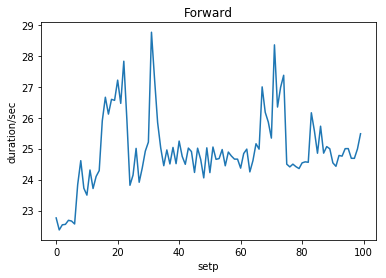

2018-02-14 20:00:29.793116:Forward across 100 steps, 24.936 +/- 1.175 sec / batch


In [8]:
batch_size = 32
height, width = 299, 299
inputs = tf.random_uniform((batch_size, height, width, 3))
with slim.arg_scope(inception_v3_arg_scope()):
    logits, end_points = inception_v3(inputs, is_training=True)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
num_batches = 100
time_tensorflow_run(sess, logits, "Forward")